In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bowtie2-build chr19.fa chr19

for sample in CTCF_ER4 CTCF_G1E input_ER4 input_G1E; do   bowtie2 -x chr19 -U ${sample}.fastq -S ${sample}.sam -p 6;   samtools view -bSo ${sample}.bam ${sample}.sam;   samtools sort ${sample}.bam ${sample}.sorted;   samtools index ${sample}.sorted.bam; done

macs2 callpeak -t CTCF_G1E.bam -c input_G1E.bam --format=BAM --name=G1E --gsize=61000000 --tsize=36<br/>
macs2 callpeak -t CTCF_ER4.bam -c input_ER4.bam --format=BAM --name=ER4 --gsize=61000000 --tsize=36

bedtools intersect -v -a G1E_peaks.narrowPeak -b ER4_peaks.narrowPeak > loss.bed<br/>
bedtools intersect -v -a ER4_peaks.narrowPeak -b G1E_peaks.narrowPeak > gain.bed

bedtools intersect -a Mus_musculus.GRCm38.94_features.bed -b G1E_peaks.narrowPeak > G1E_features.bed<br/>
bedtools intersect -a Mus_musculus.GRCm38.94_features.bed -b ER4_peaks.narrowPeak > ER4_features.bed

cut -f 4 G1E_features.bed | sort | uniq -c > G1Efeature_count.txt<br/>
cut -f 4 ER4_features.bed | sort | uniq -c > ER4feature_count.txt

wc -l loss.bed > loss_gained.txt<br/>
wc -l gain.bed >> loss_gained.txt

In [2]:
# f = open('G1Efeature_count.txt','r')
# fs = open('ER4feature_count.txt','r')
# fl = open('loss_gained.txt','r')
# g1e_feat = f.r()
# er4_feat = fs.readlines()
# lossgain = fl.readlines()
# f.close()
# fs.close()
# fl.close()
g1e_df = pd.read_csv('G1Efeature_count.txt',header = None, sep = '\s+')
er4_df = pd.read_csv('ER4feature_count.txt', header = None, sep = '\s+')
loss_gain_df = pd.read_csv('loss_gained.txt', header = None, sep = '\s+')

In [8]:
g1e_df.columns = ['g_count','feature']
er4_df.columns = ['e_count','feature']
g1e_df

,g_count,feature
0,84,exon
1,307,intron
2,54,promoter


In [9]:
er4_df

,e_count,feature
0,101,exon
1,341,intron
2,67,promoter


In [10]:
feature_df = g1e_df.merge(er4_df, on = ['feature'])
feature_df

,g_count,feature,e_count
0,84,exon,101
1,307,intron,341
2,54,promoter,67


In [4]:
loss_gain_df.columns = ['count','loss_gain']
loss_gain_df

,count,loss_gain
0,57,loss.bed
1,124,gain.bed


In [5]:
loss_gain_df['loss_gain'][0] = 'loss'
loss_gain_df['loss_gain'][1] = 'gain'

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
loss_gain_df

,count,loss_gain
0,57,loss
1,124,gain


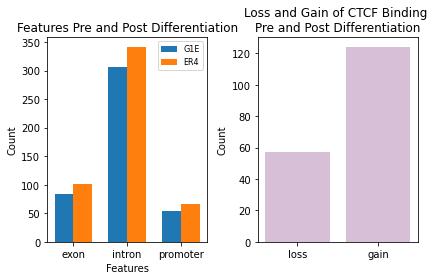

In [35]:
label = ["exon","intron","promoter"]
x = np.arange(len(label))  # the label locations
width = 0.35

fig, ax = plt.subplots(ncols=2)

rects1 = ax[0].bar(x - width/2, feature_df['g_count'], width, label='G1E')
rects2 = ax[0].bar(x + width/2, feature_df['e_count'], width, label='ER4')
ax[0].set_title('Features Pre and Post Differentiation')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Count')
ax[0].set_xticks(x)
ax[0].set_xticklabels(label)
ax[0].legend(loc='upper right', prop={'size': 8})

ax[1].bar(loss_gain_df['loss_gain'],loss_gain_df['count'], color = 'thistle')
ax[1].set_title('Loss and Gain of CTCF Binding \nfrom G1E to ER4')
ax[1].set_ylabel('Count')

fig.tight_layout()
plt.show()

### Part 2: Motif Finding

>sort -nr -k 7 ER4_peaks.narrowPeak | head -n 100 > 100ER4.narrowPeak<br/>
>bedtools getfasta -fi chr19.fa -bed 100ER4.narrowPeak > 100ER4.fa<br/>
>meme-chip -meme-maxw 20 -db /Users/cmdb/qbb2020-answers/week5/motif_databases/JASPAR/JASPAR_CORE_2016.meme* 100ER4.fa > found_motifs.txt<br/>
>epstopdf logo.eps

logo.pdf is attached